# Boletins de ocorrência registrados na Grande São Paulo em 2016

Neste passo-a-passo analisaremos um conjunto de dados referente às ocorrências policiais registradas na Grande São Paulo durante o ano de 2016. Os dados estão disponíveis [aqui](https://data.world/maszanchi/boletins-de-ocorrencia-sp-2016). A tabela a seguir apresenta os campos e uma breve descrição deles.

| Campo                 | Descrição                                                         |
|:----------------------|:------------------------------------------------------------------|
|NUM_BO                 | Ano da ocorrencia                                                 |
|ANO_BO                 | Número do BO                                                      |
|ID_DELEGACIA           | Código da delegacia responsável pelo registro da ocorrencia       |
|NOME_DEPARTAMENTO      | Departamento responsável pelo registro                            |
|NOME_SECCIONAL         | Delegacia Seccional responsável pelo registro                     |
|DELEGACIA              | Delegacia responsável pelo registro                               |
|NOME_DEPARTAMENTO_CIRC | Departamento responsável pela área onde houve a ocorrencia        |
|NOME_SECCIONAL_CIRC    | Delegacia Seccional responsável pela área onde houve a ocorrencia |
|NOME_DELEGACIA_CIRC    | Delegacia responsável pela área onde houve a ocorrencia           |
|ANO                    | Ano do registro                                                   |
|MES                    | Mês do registro                                                   |
|DATA_OCORRENCIA_BO     | Data do fato                                                      |
|HORA_OCORRENCIA_BO     | Hora do fato                                                      |
|FLAG_STATUS            | Indica se é crime consumado ou tentado                            |
|RUBRICA                | Natureza juridica da ocorrencia                                   |
|DESDOBRAMENTO          | Desdobramentos juridicos envolvidos na ocorrencia                 |
|CONDUTA                | Tipo de local ou circunstancia que qualifica a ocorrencia         |
|LATITUDE               | Coordenadas geograficas                                           |
|LONGITUDE              | Coordenadas geograficas                                           |
|CIDADE                 | Municipio de registro da ocorrencia                               |
|LOGRADOURO             | Logradouro do fato                                                |
|NUMERO_LOGRADOURO      | Número do Logradouro do fato                                      |
|FLAG_STATUS            | Indica se é crime consumado ou tentado                            |
|DESCR_TIPO_PESSOA      | Indica o tipo de envolvimento da pessoa na ocorrencia             |
|CONT_PESSOA            | Indica ordem de registro da pessoa no BO                          |
|SEXO_PESSOA            | Sexo da pessoa relacionada                                        |
|IDADE_PESSOA           | Idade da pessoa relacionada                                       |
|COR                    | Cor/raça da pessoa relacionada                                    |
|DESCR_PROFISSAO        | Profissão da pessoa                                               |
|DESCR_GRAU_INSTRUCAO   |Grau de intrução da pessoa                                         |

## Pré-processamento

Vamos inicializar o sistema para a análise: bibliotecas e conjunto de dados.

In [1]:
import numpy
import pandas

from matplotlib import pyplot
%matplotlib inline

pyplot.style.use('fivethirtyeight')
pyplot.rcParams['figure.figsize'] = [11, 8]

In [2]:
url = '../dat/boletins_ocorrencia_sp_clean_2016.csv.gz'
dat = pandas.read_csv(url, encoding='ISO-8859-1', low_memory=False)

In [3]:
dat.describe()

,NUM_BO,ANO_BO,ID_DELEGACIA,ANO,MES,LATITUDE,LONGITUDE
count,7.703710e+05,770371.000000,770371.000000,770371.0,770371.000000,728307.000000,728306.000000
mean,2.901050e+05,2016.009617,325479.219555,2016.0,6.516172,-23.572287,-46.609430
std,4.841995e+05,0.097596,415652.088927,0.0,3.440876,0.084795,0.135968
min,1.000000e+00,2016.000000,10004.000000,2016.0,1.000000,-24.004595,-50.800173
25%,2.014000e+03,2016.000000,10365.000000,2016.0,4.000000,-23.633230,-46.697253
50%,5.317000e+03,2016.000000,30212.000000,2016.0,7.000000,-23.557176,-46.626611
75%,4.570565e+05,2016.000000,900020.000000,2016.0,10.000000,-23.519764,-46.519320
max,1.673679e+06,2017.000000,990900.000000,2016.0,12.000000,-21.774212,-45.755827


In [4]:
dat.head()

,NUM_BO,ANO_BO,ID_DELEGACIA,NOME_DEPARTAMENTO,NOME_SECCIONAL,DELEGACIA,NOME_DEPARTAMENTO_CIRC,NOME_SECCIONAL_CIRC,NOME_DELEGACIA_CIRC,ANO,...,RUBRICA,DESDOBRAMENTO,CONDUTA,LATITUDE,LONGITUDE,CIDADE,LOGRADOURO,NUMERO_LOGRADOURO,FLAG_STATUS.1,Unnamed: 21
0,3784,2016,10101,DECAP,DEL.SEC.1º CENTRO,01º D.P. SE,DECAP,DEL.SEC.1º CENTRO,78º D.P. JARDINS,2016,...,Furto (art. 155),NaN,TRANSEUNTE,-23.564984,-46.652035,S.PAULO,AVENIDA PAULISTA,1000,C,NaN
1,3426,2016,10102,DECAP,DEL.SEC.1º CENTRO,02º D.P. BOM RETIRO,DECAP,DEL.SEC.1º CENTRO,03º D.P. CAMPOS ELISEOS,2016,...,Roubo (art. 157),NaN,TRANSEUNTE,-23.542476,-46.641928,S.PAULO,PRAÇA DA REPUBLICA,0,C,NaN
2,6359,2016,10102,DECAP,DEL.SEC.1º CENTRO,02º D.P. BOM RETIRO,DECAP,DEL.SEC.1º CENTRO,03º D.P. CAMPOS ELISEOS,2016,...,Drogas sem autorização ou em desacordo (Art.33...,NaN,NaN,-23.542183,-46.640599,S.PAULO,RUA CONSELHEIRO NEBIAS,0,C,NaN
3,1267,2016,10103,DECAP,DEL.SEC.1º CENTRO,03º D.P. CAMPOS ELISEOS,DECAP,DEL.SEC.8º SAO MATEUS,49º D.P. SAO MATEUS,2016,...,Roubo (art. 157),NaN,CARGA,-23.609275,-46.455087,S.PAULO,RUA MADUREIRA CALHEIROS,15,C,NaN
4,4804,2016,10106,DECAP,DEL.SEC.1º CENTRO,06º D.P. CAMBUCI,DECAP,DEL.SEC.1º CENTRO,06º D.P. CAMBUCI,2016,...,Lesão corporal (art. 129),NaN,NaN,-23.573928,-46.620693,S.PAULO,RUA ROBERTSON,625,C,NaN


### Algumas correções

O conjunto de dados possui algumas inconsistências.

1. Remover os espaços no nome de municípios.

In [5]:
dat['CIDADE'] = dat['CIDADE'].map(lambda x: x.strip())

## Análise preliminar

Todo prolema em ciências de dados começa com a análise preliminar do conjunto a ser analisado.

### Número de ocorrências ao longo do tempo

Vamos agrupar as ocorrências registradas por cidade e verificar a evolução ao longo do tempo.

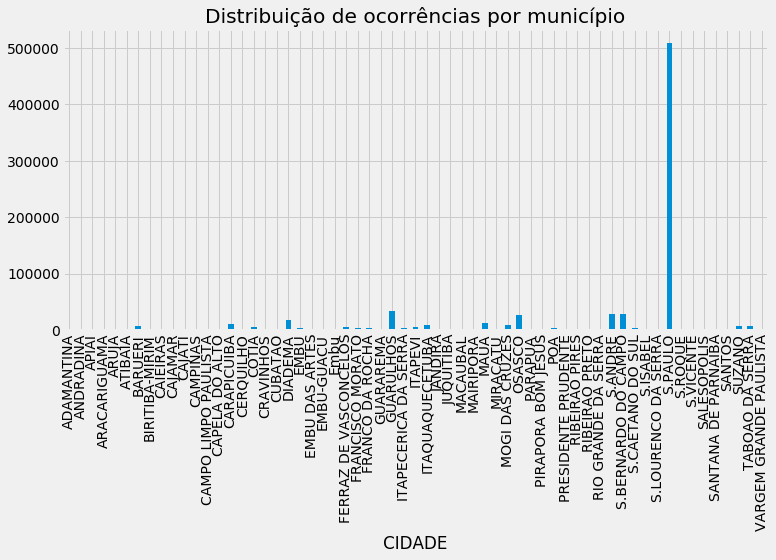

In [6]:
table = pandas.pivot_table(dat, index=['CIDADE'], columns=['ANO'],
                           values='NUM_BO', aggfunc=numpy.count_nonzero)
ax = table.plot(title='Distribuição de ocorrências por município', kind='bar',
                legend=False)
pyplot.tight_layout()

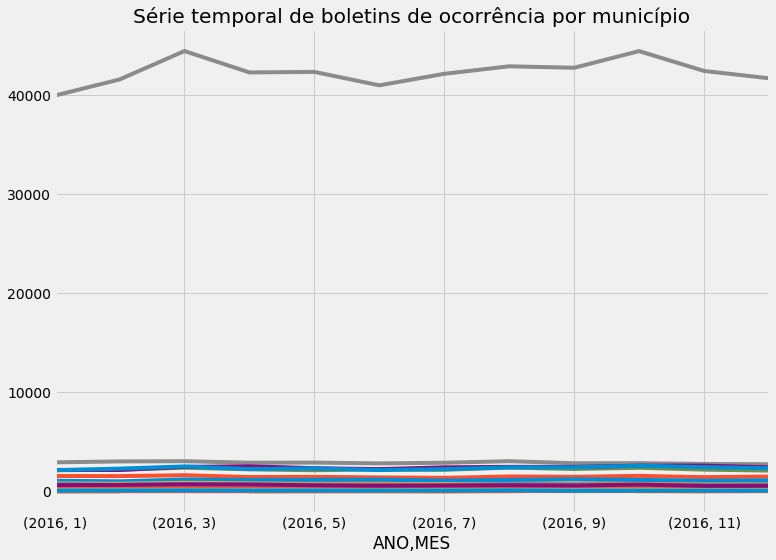

In [7]:
table = pandas.pivot_table(dat, index=['ANO', 'MES'], columns=['CIDADE'],
                           values='NUM_BO', aggfunc=numpy.count_nonzero)
ax = table.plot(title='Série temporal de boletins de ocorrência por município',
                legend=False)
pyplot.tight_layout()

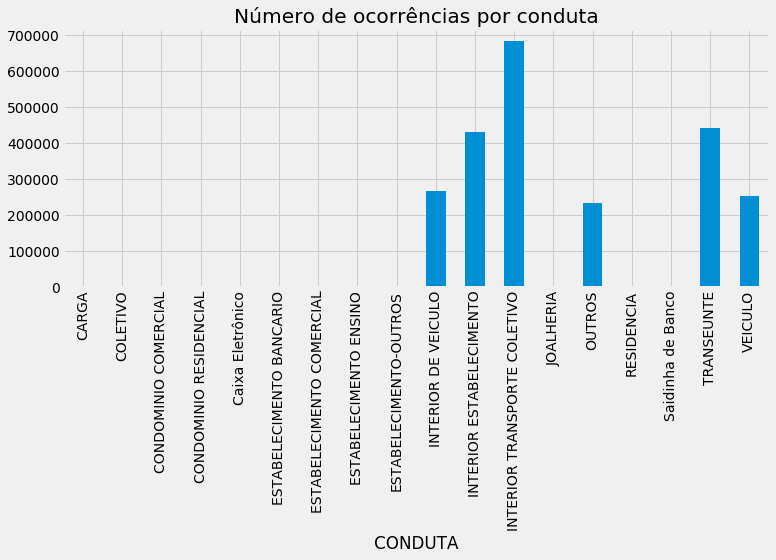

In [8]:
table = pandas.pivot_table(dat, columns=['CONDUTA'], values='NUM_BO')
ax = table.plot(kind='bar', title='Número de ocorrências por conduta')
pyplot.tight_layout()

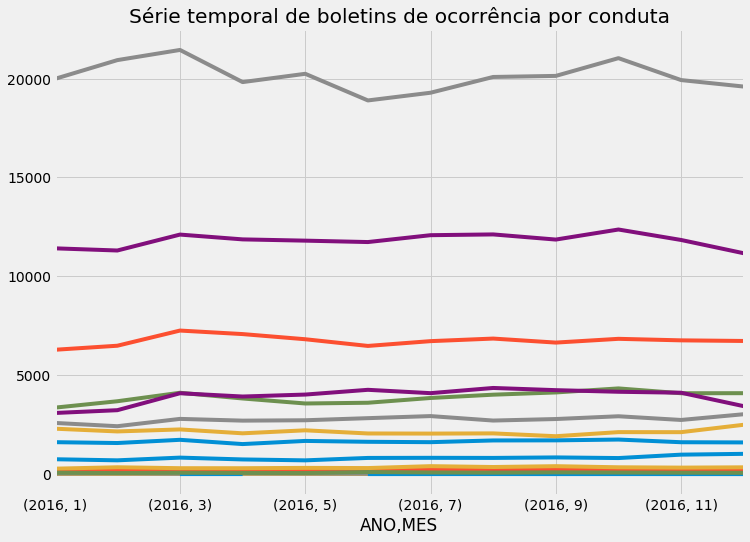

In [9]:
table = pandas.pivot_table(dat, index=['ANO', 'MES'], columns=['CONDUTA'],
                           values='NUM_BO', aggfunc=numpy.count_nonzero)
table.plot(title='Série temporal de boletins de ocorrência por conduta', legend=False)

### Mapa de ocorrências

Onde acontecem as principais ocorrências?

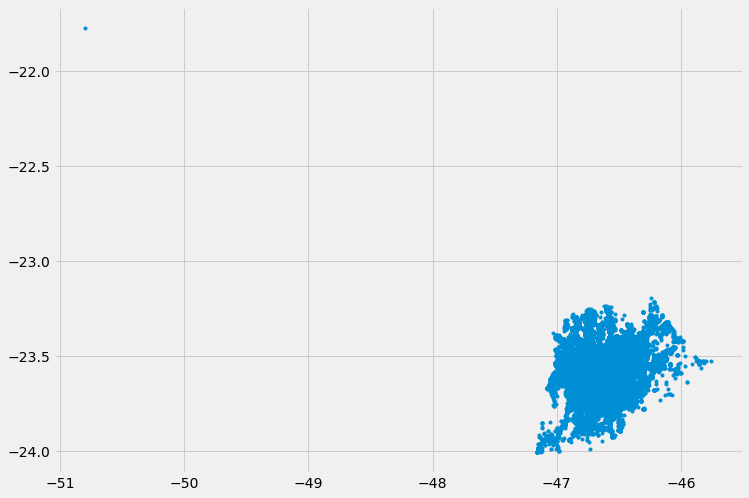

In [10]:
lon, lat = dat['LONGITUDE'], dat['LATITUDE']
pyplot.plot(lon, lat, '.')
pyplot.show()